# Сборный проект

Цель: выявить закономерности, определяющие успешность игры
План работы:
1. Загрузка и описание данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Портрет пользователя по регионам
5. Проверка гипотез
6. Общий вывод

# Загрузка набора данных и общая информация

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats as st


# путь для локальной работы
path = r"C:\Users\Gleb\Мой диск\ЯПрактикум\Сборный проект 1\games.csv"

# загрузка датасета
try:
    data = pd.read_csv(path)
except:
    data = pd.read_csv('/datasets/games.csv')

# первые строки
display(data.head())
# информация о наборе данных
display(data.info())
# описательная статистика
display(data.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Описание

Набор данных содержит в себе информацию о продажах видеоигр. Отражены продажи в разных регионах, год выпуска, жанр и другие параметры. В таблице 16715 строк, присутствуют пропуски в колонках Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. Судя по общей статистике числовых значений, аномалий нет, все значения выглядят реальными.

# Подготовка данных

In [81]:
# приведем названия столбцов к snake_case
data.rename(str.lower, axis=1, inplace=True)

# перед тем, как изменять типы данных колонок, нужно обработать пропуски, иначе
# придется оставить тип float

# в колонке name отсутсвует значение у 2 записей
display(data[data['name'].isna()])
# изучение этих строк показывает, что по ним совсем нет информации. Удаляю
data.dropna(subset=['name'], inplace=True)
data.reset_index(inplace=True, drop=True)

# пропуски в колонке year_of_release у почти 300 объектов. Слишком много, чтобы удалить
# или обработать вручную. Объекты ничем не связаны. Заполню "0", будет ясно, что год отсутствовал
display(data[data['year_of_release'].isna()])
data.fillna({'year_of_release': 0}, inplace=True)

# пропуски в колонке critic_score у половины объектов. Оценка 0 не занята, поэтому заполню этим значением
# и буду держать в уме, что 0 = отсутствии оценки
data.fillna({'critic_score': 0}, inplace=True)

# пропуски в колонке user_score у почти 7000 объектов. Поступим аналогично колонке critic_scor
# и заменим на 0.0. Такая оценка есть у одной игры, не страшно
data.fillna({'user_score': 0.0}, inplace=True)

# аббревиатура tbd встречается 2424 раза и означает to be determined, то есть данные подлежат уточнению. Раз их не уточнили,
# считаю что их нет и заменяю на 0.0
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0.0

# в колонке rating 6764 пропусков, на заполнить их не представляется возможным. Оставляю

# Проверяю, что в наборе данных не осталось лишних пропусков
display(data.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [82]:
# пропуски в rating
data.fillna({'rating': 'unknown'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Описание пропусков

Методы заполнения или удаления пропущенных значений описаны в комментариях к коду. Главный - проверяю, что 0 свободен и заполняю им, чтобы было ясно, что данных нет. Так как данные собраны из открытых источников, неудивительно, что есть много пропусков в колонках с оценками и рейтингом. Часть рейтингов не удалось найти, для какой-то части игр это может быть связано с низкой популярностью - недостаточное количество игроков для оценки.


## Преобразование типов данных

In [83]:
# преобразование типов данных в колонках
# колонке year_of_release присвоим тип int, так как содержит информацию о годах
data['year_of_release'] = data['year_of_release'].astype(int)

# колонке critic_score присвоим тип int, так как содержит только целые числа
data['critic_score'] = data['critic_score'].astype(int)

# колонке user_score присвоим тип float, так как содержит дробные числа
data['user_score'] = data['user_score'].astype(float)

# убедимся в замене
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


## Введем дополнительный столбец с суммарными продажами во всех регионах

In [84]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

# Исследовательский анализ данных

(1980.0, 2016.0)

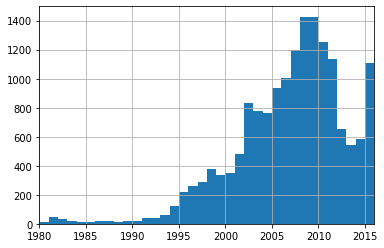

In [85]:
# Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
# Посмотрим при помощи гистограммы

data.loc[data['year_of_release'] != 0]['year_of_release'].hist(bins=36).set_xlim(1980, 2016)

До 1995 года в год выходило мало игр, до 60. С 1995 этот параметр не опускался ниже 200, а пика достиг в 2008-2009 - 1400 игр в год. Большинство игр было выпущено с 2005 по 2017, можно рассматривать только этот период.

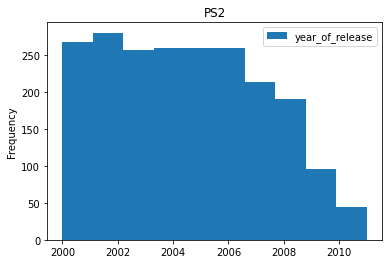

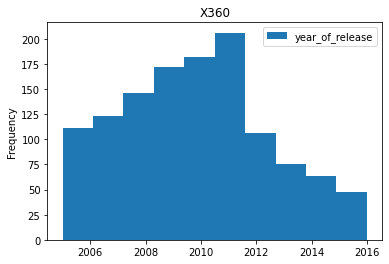

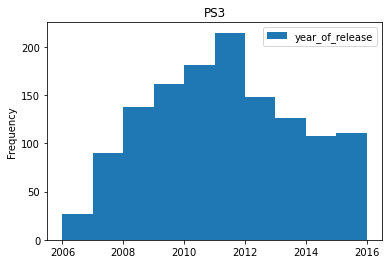

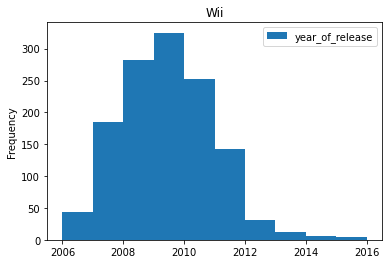

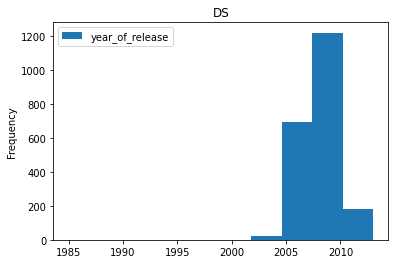

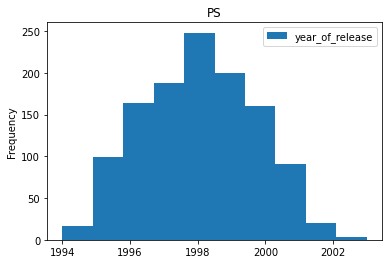

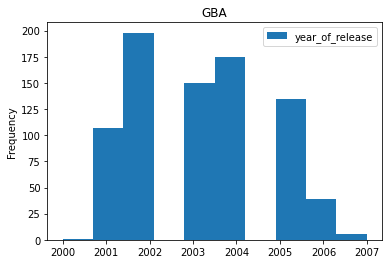

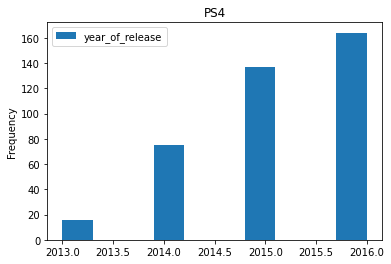

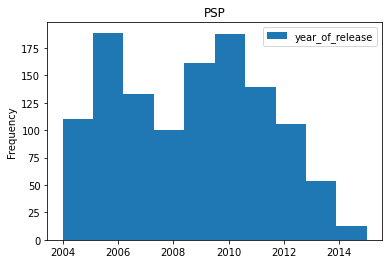

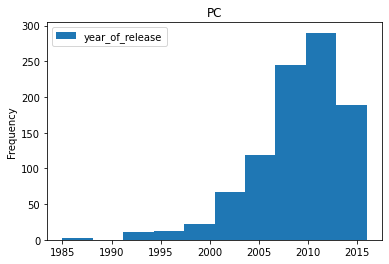

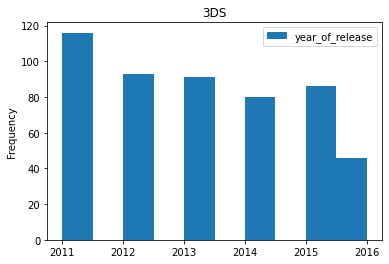

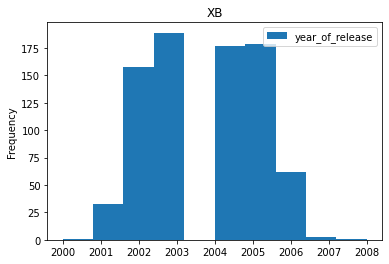

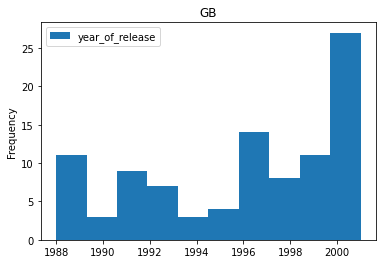

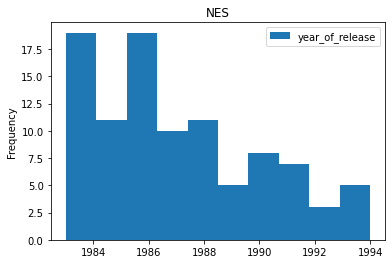

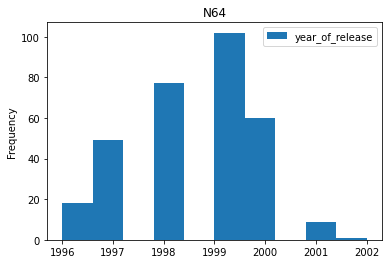

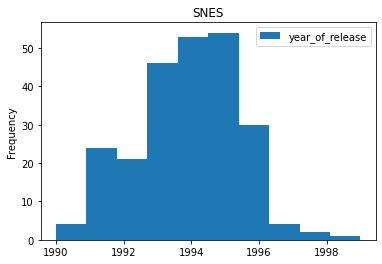

In [86]:
# как менялись продажи по платформам
# Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
# За какой характерный срок появляются новые и исчезают старые платформы?

# создам список платформ по продажам и возму 15 с самыми высокими продажами
platforms = data.groupby('platform').agg(sales=('all_sales', 'sum')).sort_values(by=['sales'], ascending=False)
popular_platforms = platforms.index.to_list()[0:16]

# при помощи гистограм  изучу, как появляются и исчезают пдатформы
# для этого изучу, как для каждой платформы распределяется кол-во игр по годам
for i in popular_platforms:
    sub = data.loc[data['platform'] == i]
    sub.loc[sub['year_of_release'] != 0].plot(y='year_of_release', kind='hist', title=i)

Исходя из гистограмм я оцениваю срок жизни платформы в 10 лет. Есть исключения, а PC - вечен :)

Для исследования я выбрал в качестве актуального периода данные с 2005 по н.в., так как уровнень продаж находился в одной категории. В 2012-13 было снижение кол-ва игр, но 2016 больше соответствует предыдущему акруальному периоду. Можно ожидать от 2017 того же.

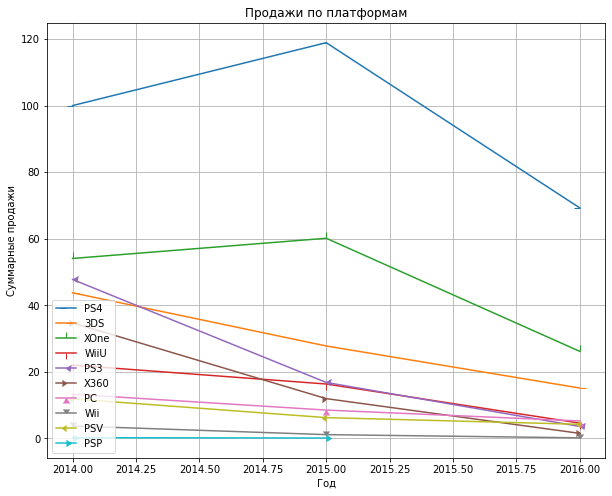

In [87]:
# выбор актуального периода
data_actual = data.query('year_of_release > 2013')

# Какие платформы лидируют по продажам, растут или падают?
# Выберите несколько потенциально прибыльных платформ.

# построю график в координатах год - продажи. Каждая линия - одна платформа
fig, ax = plt.subplots(figsize=(10, 8))
k=0
for i in data_actual.platform.unique():
    sub = data_actual.loc[data_actual['platform'] == i]\
                .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    ax.plot(sub.index, sub['all_sales'], label=i, marker=k)
    
    k += 1
    if k > 11:
        k = 0

ax.grid(True)
ax.set_xlabel('Год')  # Add an x-label to the axes.
ax.set_ylabel('Суммарные продажи')  # Add a y-label to the axes.
ax.set_title("Продажи по платформам")
ax.legend(loc=3)


В выбранный актуальный период лидерами по продажам являются платформы PS4, XOne и Wii. Все они,  а также многие другие идут на спад. Растут (со снижением в 2016, что может свидетельствовать о выпавшем годе, но не тренде) PS4 и XOne. Их жизненный цикл начался в 2013 году и в 2018 должен достичь пика по кол-ву игр и их продажам. Это самые перспективные платформы на 2017 год.

Также стоит присмотреться к дргим платформам, которые находятся в начале жизненного цикла и могут начать расти: PSV, WiiU

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

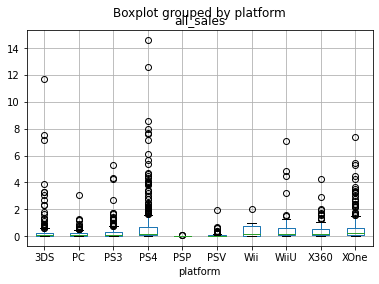

In [88]:
# Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
# Опишите результат

# for i in data_actual.platform.unique():
#     fig, ax = plt.subplots()
#     ax.boxplot(data_actual.loc[data_actual['platform'] == i]['all_sales'])
#     ax.set_title(i)
#     ax.grid(True)
#     # ax.set_ylim([0, 0.5])
#     plt.show()

# fig, ax = plt.subplots()
# ax.boxplot(data_actual.loc[data_actual['platform'] == i]['all_sales'])

data_actual.boxplot(by='platform', column='all_sales')

График "ящик с усами" для продаж игр по актуальным платформам показывает, кол-во проданных игр значительно зависит от популярности платформы. У менее популярных основная масса игр редко достигает миллиона проданных копий одной игры, у более популярных (PS4, X360, PS5) большая часть игр продается тиражем до 2 - 2,5 млн. Самая популярная платформа и игры с наибольшим кол-вом проданных копий - на wii и ds. У каждой платформы есть набор сверхпопулярных, основных игр, которые выглядят аномалиями на фоне распределения основных игр. Возможно, как раз эти "аномалии" и являются особенно важными в этом исследовании - можно спрогнозировать такую игру и зарабатывать на ее продажах. Или определить уже популярную и сосредоточится на ее продажах.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Корреляция продаж видеоигр на платформе PS4 с оценками критиков: 0.40266141068104083
Корреляция продаж видеоигр на платформе PS4 с оценками пользователей: -0.04013158947269735


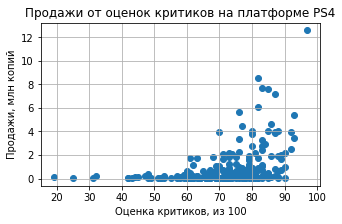

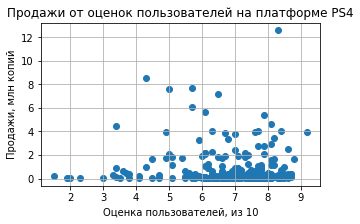

In [89]:
# в качестве популярной платформы выбираю PS4

# диаграмма рассеяния продаж от оценок критиков
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "PS4" and critic_score != 0')['critic_score'], y=data_actual.query('platform == "PS4" and critic_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок критиков на платформе PS4')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка критиков, из 100')

# корреляция
print('Корреляция продаж видеоигр на платформе PS4 с оценками критиков:', data_actual.query('platform == "PS4" and critic_score != 0')['critic_score'].corr(data_actual.query('platform == "PS4" and critic_score != 0')['all_sales']))

# диаграмма рассеяния от оценок пользователей
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "PS4" and user_score != 0')['user_score'], y=data_actual.query('platform == "PS4" and user_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок пользователей на платформе PS4')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка пользователей, из 10')

# корреляция
print('Корреляция продаж видеоигр на платформе PS4 с оценками пользователей:', data_actual.query('platform == "PS4" and user_score != 0')['user_score'].corr(data_actual.query('platform == "PS4" and user_score != 0')['all_sales']))


Отзывы - только один из факторов, влияющих на продажи игры. Корреляция кол-ва продаж с оценкой пользователей - отсутствует. Можно предположить, что к мнению критиков прислушиваются и покупают - корреляция ниже средней, но выше предыдущей - 0,4. Несмотря на то, что корреляция довольно слабая, на распределении видно увеличение кол-ва проданных копий с увеличением оценки критиков, начиная с оценки 60. Игры, оцененные на 90+ всегда продаются значительно отличающемся от 0 тиражем. У пользователей тоже есть рост продаж "хороших игр", но не такой очевидный. В распределении от пользовательской оценки больше аномальных игр с низкой оценкой и большим количеством продаж. Возможно, дело в стоимости или обратном эффекте от оценки. Даже будучи плохо принятой пользователями, игра вирусится.

Соотнесите выводы с продажами игр на других платформах.

Корреляция продаж видеоигр на платформе XOne с оценками критиков: 0.4286769437033323
Корреляция продаж видеоигр на платформе XOne с оценками пользователей: -0.0703839280647581
Корреляция продаж видеоигр на платформе 3DS с оценками критиков: 0.314117492869051
Корреляция продаж видеоигр на платформе 3DS с оценками пользователей: 0.21519327185270282
Корреляция продаж видеоигр на платформе WiiU с оценками критиков: 0.370201412480884
Корреляция продаж видеоигр на платформе WiiU с оценками пользователей: 0.40792645792170784
Корреляция продаж видеоигр на платформе PC с оценками критиков: 0.1746341376935003
Корреляция продаж видеоигр на платформе PC с оценками пользователей: -0.07159665703472451


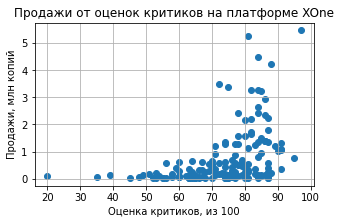

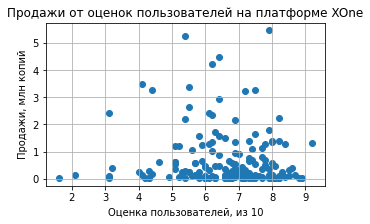

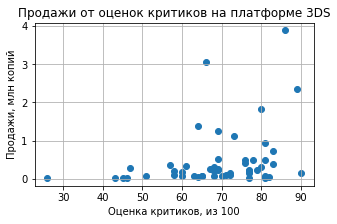

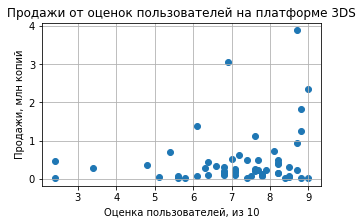

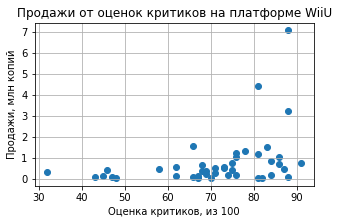

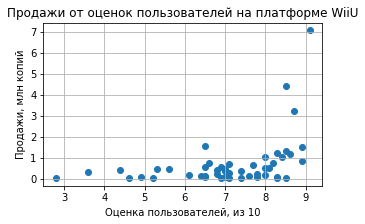

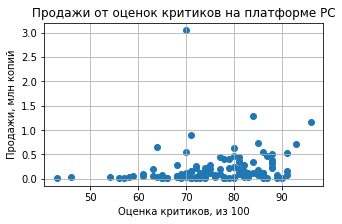

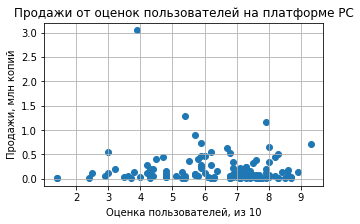

In [90]:
# Повторю расчеты для нескольких популярных платформ: 
# XOne
# диаграмма рассеяния продаж от оценок критиков
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "XOne" and critic_score != 0')['critic_score'], y=data_actual.query('platform == "XOne" and critic_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок критиков на платформе XOne')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка критиков, из 100')

# корреляция
print('Корреляция продаж видеоигр на платформе XOne с оценками критиков:', data_actual.query('platform == "XOne" and critic_score != 0')['critic_score'].corr(data_actual.query('platform == "XOne" and critic_score != 0')['all_sales']))

# диаграмма рассеяния от оценок пользователей
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "XOne" and user_score != 0')['user_score'], y=data_actual.query('platform == "XOne" and user_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок пользователей на платформе XOne')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка пользователей, из 10')

# корреляция
print('Корреляция продаж видеоигр на платформе XOne с оценками пользователей:', data_actual.query('platform == "XOne" and user_score != 0')['user_score'].corr(data_actual.query('platform == "XOne" and user_score != 0')['all_sales']))

# 3DS
# диаграмма рассеяния продаж от оценок критиков
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "3DS" and critic_score != 0')['critic_score'], y=data_actual.query('platform == "3DS" and critic_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок критиков на платформе 3DS')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка критиков, из 100')

# корреляция
print('Корреляция продаж видеоигр на платформе 3DS с оценками критиков:', data_actual.query('platform == "3DS" and critic_score != 0')['critic_score'].corr(data_actual.query('platform == "3DS" and critic_score != 0')['all_sales']))

# диаграмма рассеяния от оценок пользователей
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "3DS" and user_score != 0')['user_score'], y=data_actual.query('platform == "3DS" and user_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок пользователей на платформе 3DS')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка пользователей, из 10')

# корреляция
print('Корреляция продаж видеоигр на платформе 3DS с оценками пользователей:', data_actual.query('platform == "3DS" and user_score != 0')['user_score'].corr(data_actual.query('platform == "3DS" and user_score != 0')['all_sales']))

# WiiU
# диаграмма рассеяния продаж от оценок критиков
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "WiiU" and critic_score != 0')['critic_score'], y=data_actual.query('platform == "WiiU" and critic_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок критиков на платформе WiiU')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка критиков, из 100')

# корреляция
print('Корреляция продаж видеоигр на платформе WiiU с оценками критиков:', data_actual.query('platform == "WiiU" and critic_score != 0')['critic_score'].corr(data_actual.query('platform == "WiiU" and critic_score != 0')['all_sales']))

# диаграмма рассеяния от оценок пользователей
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "WiiU" and user_score != 0')['user_score'], y=data_actual.query('platform == "WiiU" and user_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок пользователей на платформе WiiU')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка пользователей, из 10')

# корреляция
print('Корреляция продаж видеоигр на платформе WiiU с оценками пользователей:', data_actual.query('platform == "WiiU" and user_score != 0')['user_score'].corr(data_actual.query('platform == "WiiU" and user_score != 0')['all_sales']))

# PC
# диаграмма рассеяния продаж от оценок критиков
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "PC" and critic_score != 0')['critic_score'], y=data_actual.query('platform == "PC" and critic_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок критиков на платформе PC')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка критиков, из 100')

# корреляция
print('Корреляция продаж видеоигр на платформе PC с оценками критиков:', data_actual.query('platform == "PC" and critic_score != 0')['critic_score'].corr(data_actual.query('platform == "PC" and critic_score != 0')['all_sales']))

# диаграмма рассеяния от оценок пользователей
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x=data_actual.query('platform == "PC" and user_score != 0')['user_score'], y=data_actual.query('platform == "PC" and user_score != 0')['all_sales'])
ax.grid(True)
ax.set_title('Продажи от оценок пользователей на платформе PC')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Оценка пользователей, из 10')

# корреляция
print('Корреляция продаж видеоигр на платформе PC с оценками пользователей:', data_actual.query('platform == "PC" and user_score != 0')['user_score'].corr(data_actual.query('platform == "PC" and user_score != 0')['all_sales']))

В основном результаты соотносятся между платормами: корреляция кол-ва продаж с оценкой критиков всегда выше, чем с оценкой пользователей. Значения могут отличаться, при этом на сопоставимых платформах значения близки. На всех графиках заметно увеличение продаж игр с высокой оценкой. Единственное исключение - платформа WiiU. На ней корреляция продаж с отзывами критиков и с отзывами игроков почти равна.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
genre,,,,,,,,,,,
Puzzle,14,14,14,14,14,14,14,14,14,14,14
Strategy,37,37,37,37,37,37,37,37,37,37,37
Platform,38,38,38,38,38,38,38,38,38,38,38
Simulation,44,44,44,44,44,44,44,44,44,44,44
Fighting,60,60,60,60,60,60,60,60,60,60,60
Racing,69,69,69,69,69,69,69,69,69,69,69
Misc,113,113,113,113,113,113,113,113,113,113,113
Shooter,128,128,128,128,128,128,128,128,128,128,128
Sports,161,161,161,161,161,161,161,161,161,161,161


,number,sales,revenue
genre,,,
Adventure,185,17.55,0.094865
Strategy,37,3.96,0.107027
Puzzle,14,2.21,0.157857
Simulation,44,13.13,0.298409
Action,619,199.36,0.322068
Misc,113,37.55,0.332301
Racing,69,27.52,0.398841
Role-Playing,221,101.44,0.459005
Fighting,60,28.22,0.470333


<BarContainer object of 12 artists>

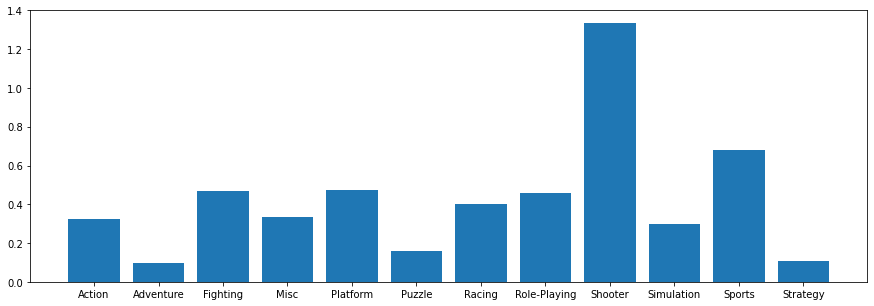

In [91]:
# распределение игр по жанрам (кол-во игр)
display(data_actual.groupby(['genre']).count().sort_values('name'))

#  чтобы оценить прибыльность игр по жанрам, сгруппируем датасет по жанрам и поделим общее кол-во продаж на количество игр
subset = data_actual.groupby(['genre']).agg(number=('name', 'count'), sales=('all_sales', 'sum'))
subset['revenue'] = subset['sales'] / subset['number'] 
display(subset.sort_values('revenue'))

# добавлю график
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x=subset.index, height=subset['revenue'])

Больше всего игр принадлежат жанру Action, с значительным отставанием идут Sports и Misc. Непопулярные жанры - Puzzle, Strategy и Platform.
Располагаемые данные не дают информации о прибыли или хотя бы выручке в денежном выражении, но можно расчитать, какие жанры лучше продаются. Лушие: Shooter, Platform и Sports. Худшие: Adventure, Strategy и Puzzle.

#  Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Топ-5 популярных платформ в регионе na_sales: ['PS4', 'XOne', 'X360', '3DS', 'PS3']
Топ-5 популярных платформ в регионе eu_sales: ['PS4', 'XOne', 'PS3', 'PC', '3DS']
Топ-5 популярных платформ в регионе jp_sales: ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']


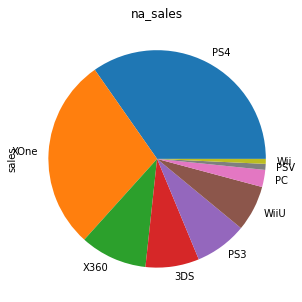

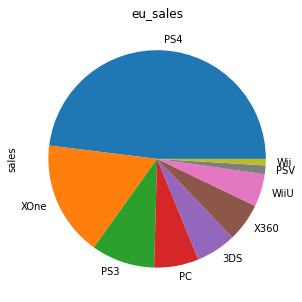

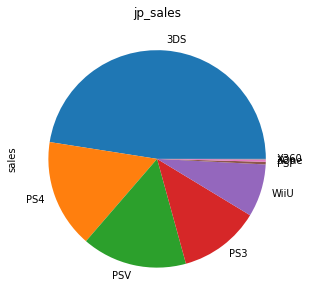

In [92]:
# определим популярные платформы и посмотрим на продажи
regions = ['na_sales', 'eu_sales', 'jp_sales']

for i in regions:
    subset = data_actual.groupby(['platform']).agg(sales=(i, 'sum')).sort_values('sales', ascending=False)
    print(f'Топ-5 популярных платформ в регионе {i}: {subset.index.to_list()[0:5]}')
    subset.plot(kind='pie', y='sales', title=i, figsize=(10, 5), legend=False)

Топ-5 популярных платформ в регионе na_sales: ['PS4', 'XOne', 'X360', '3DS', 'PS3']

Топ-5 популярных платформ в регионе eu_sales: ['PS4', 'XOne', 'PS3', 'PC', '3DS']

Топ-5 популярных платформ в регионе jp_sales: ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']

Рынки eu и na похожи по составу популярных популярных платформ. На обоих рынках PS4 занимает самую большую долю, далее идет XOne. после них - PS3 или X360. Игры под эти устройства составляют 3/4 всех продаж. Рынок Японии значительно отличается по составу лидеров, в нем находятся разные консоли японского происхождения. При планировании продаж стоит учесть это распределение.

Топ-5 популярных жанров в регионе na_sales: ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']
Топ-5 популярных жанров в регионе eu_sales: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
Топ-5 популярных жанров в регионе jp_sales: ['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']


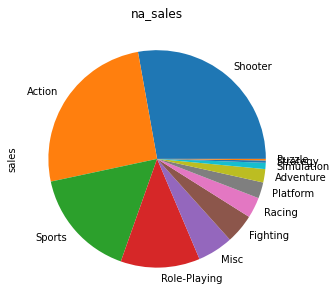

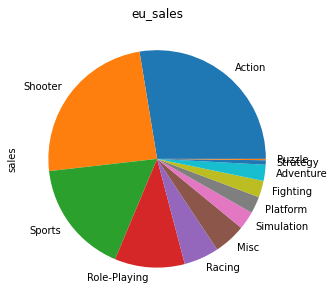

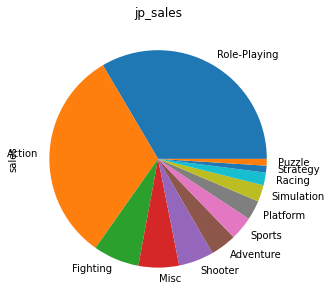

In [93]:
# определим популярные жанры и посмотрим на продажи

for i in regions:
    subset = data_actual.groupby(['genre']).agg(sales=(i, 'sum')).sort_values('sales', ascending=False)
    print(f'Топ-5 популярных жанров в регионе {i}: {subset.index.to_list()[0:5]}')
    subset.plot(kind='pie', y='sales', title=i, figsize=(150, 5), legend=False)

И снова рынки Европы и северной Америки очень похожи: меняются местами 1 и 2 место. Дальнейшнее распределение по жанрам похожее. Жанры Shooter и Action занимают почти четверти от всех жанров.
Сильно отличается распределение продаж жанров в Японии. Первое место с большим отрывом занимает Role-Playing (более 30 процентов). Action-игры популярны так же, как и на западных рынках. Предполагаю, что такая разница в платформах и жанрах между рынками Японии и другими обуловлена культурными особенностями потеребителей. Предположительно, у игроков из Японии другие интересы и традиции. Из-за жанров и других особенностей игры может отличаться и набор популярных платформ.

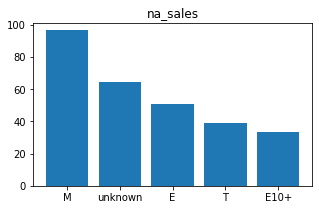

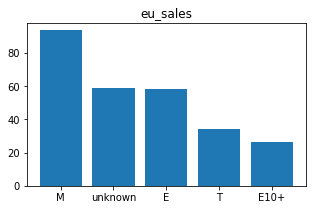

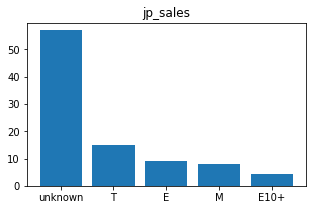

In [94]:
# Влияет ли рейтинг на продажи в отдельном регионе
# не совсем понятно, как продемонстрировать влияние рейтинга на продажи. Сравнить страны между собой? 
for i in regions:
    fig, ax = plt.subplots(figsize=(5, 3))
    subset = data_actual.groupby(['rating']).agg(sales=(i, 'sum')).sort_values('sales', ascending=False)
    ax.bar(x=subset.index, height=subset['sales'])
    ax.set_title(i)

Распределение продаж игр в зависимости от рейтинга выглядит похожим на рынках Северной Америки и Европы. Игры без рейтинга - второые по продажам после игр с рейтингом M. Далее идут E, T и E10+. Рынок Японии традиционно особенный: в продажах более чем в три раза отрываются игры с неизвестным рейтингом. Это может быть связано с распространением региональных игр, которые не проходят процедуру оценки и присвоения рейтинга. Игры с рейтингом распределены иначе, чем на других рынках: T, E, M, E10+.

# Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

Гипотеза 1 нулевая: Средняя оценка пользователей платформы Xbox One == cредней оценке пользователей платформы PC. Гипотеза 1 альтернативная: Средняя оценка пользователей платформы Xbox One != cредней оценке пользователей платформы PC

Гипотеза 2 нулевая: Средняя оценка пользователями игр жанра Action == средней оценке пользователей игр жанра Sports. Гипотеза 2 альтернативная: Средняя оценка пользователями игр жанра Action != средней оценке пользователей игр жанра Sports. В этом случае нужно принять альтернативную гипотезу.

Пороговое значение alpha приму стандартные 5%.

В обоих гипотезах речь идет о средних двух независимых совокупностей, планирую использовать ttest

In [95]:
# гипотеза 1
sample_1_1 = data_actual.query('platform == "XOne" and user_score != 0')['user_score'].to_list()
sample_1_2 = data_actual.query('platform == "PC" and user_score != 0')['user_score'].to_list()

alpha = 0.05

results_1 = st.ttest_ind(sample_1_1, sample_1_2, equal_var=False)
print('p-value:', results_1.pvalue)
print('Средняя пользовательская оценка на платформе Xbox One:', np.mean(sample_1_1))
print('Средняя пользовательская оценка на платформе PC:', np.mean(sample_1_2))


if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

# гипотеза 2
sample_2_1 = data_actual.query('genre == "Action" and user_score != 0')['user_score'].to_list()
sample_2_2 = data_actual.query('genre == "Sports" and user_score != 0')['user_score'].to_list()

results_2 = st.ttest_ind(sample_2_1, sample_2_2, equal_var=False)
print('p-value:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports одинаковые')


p-value: 0.11601398086668835
Средняя пользовательская оценка на платформе Xbox One: 6.594545454545456
Средняя пользовательская оценка на платформе PC: 6.298360655737705
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые
p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные


Гипотеза 1 опровергнута: средние пользовательские рейтинги платформ Xbox One и PC разные
Гипотеза 2 подтверждена: средние пользовательские рейтинги жанров Action и Sports разные

# Общий вывод

В проекте исследованы данные об играх из открытых источников. Они содержат в себе информацию о проданных копиях по регионам, год выхода игры, жанр, рейтинг и оценки пользователей и критиков. Цель - выявить закономерности, определяющие успешность игры.

В результате работы с данными:
* данные обработаны: заполнены пропуски, преобразованы типы данных и введен дополнительный столбец
* проведен исследовательский анализ данных, который показал, что:
    * средний срок жизни платформы составляет 10 лет
    * актуальными на данный момент являются игры для платформ PS4, XOne и Wii
    * стоит продавать экстра-популярные игры для популярных платформ
    * при выборе игр для продажи нужно смотреть на оценки критиков, а не геймеров - по их оценкам корреляция с продажами выше.
    * Предпочтительные жанры для продажи - 'Shooter', 'Action', 'Sports', 'Role-Playing'.
    * Рынки Европы и Северной Америки очень похожи и сильно отличаются от японского как по жанрам, так и платформам.
* ????Проверены гипотезы. Гипотеза 1 опровергнута: средние пользовательские рейтинги платформ Xbox One и PC разные. Гипотеза 2 подтверждена: средние пользовательские рейтинги жанров Action и Sports разные.????

В качестве закономерностей, определяющие высокие продажи игры, можно выделить: принадлежность к популярному жанру, выход на популярной платформе, высокие оценки критиков.
Предполагая, что магазин относится к рынку Европы, определены игры, на которых стоит сделать ставку при разработке маркетинговых мероприятий.

Список игр: 'Grand Theft Auto V', "Uncharted 4: A Thief's End", 'The Witcher 3: Wild Hunt', 'Metal Gear Solid V: The Phantom Pain', 'Bloodborne', 'Dark Souls II', 'Overwatch'.

In [96]:
subset_rec = data_actual.query('platform in ["PS4", "XOne", "PS3", "PC"] and genre in ["Action", "Shooter", "Sports", "Role-Playing"] and critic_score > 90')
subset_rec['name'].unique()

array(['Grand Theft Auto V', "Uncharted 4: A Thief's End",
       'The Witcher 3: Wild Hunt', 'Metal Gear Solid V: The Phantom Pain',
       'Bloodborne', 'Dark Souls II', 'Overwatch'], dtype=object)